In [2]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', # 在加载 VGG16 模型时使用在 ImageNet 数据集上预训练的权重
include_top=False,
input_shape=(150, 150, 3))

#### VGG16卷积基（convolutional base）的架构

In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [4]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = 'D:/MyFolder/Work/Code/DeepLearning/小型数据集训练卷积神经网络_CNN/dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
    directory, # 路径的子目录代表不同的分类，本例中为cats和dogs
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 15ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 15ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 11ms/step


In [5]:
test_labels

array([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1.

In [4]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

#### 定义并训练密集连接分类器

In [5]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(train_features, train_labels,
epochs=30,
batch_size=20,
validation_data=(validation_features, validation_labels))

Epoch 1/30


c:\Users\ZhuoWang\.conda\envs\tf2\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


100/100 [==============================] - 1s 3ms/step - loss: 0.5840 - acc: 0.6770 - val_loss: 0.4307 - val_acc: 0.8480
Epoch 2/30
100/100 [==============================] - 0s 2ms/step - loss: 0.4229 - acc: 0.8065 - val_loss: 0.3651 - val_acc: 0.8650
Epoch 3/30
100/100 [==============================] - 0s 2ms/step - loss: 0.3500 - acc: 0.8510 - val_loss: 0.3241 - val_acc: 0.8790
Epoch 4/30
100/100 [==============================] - 0s 3ms/step - loss: 0.3214 - acc: 0.8590 - val_loss: 0.3143 - val_acc: 0.8680
Epoch 5/30
100/100 [==============================] - 0s 2ms/step - loss: 0.2917 - acc: 0.8830 - val_loss: 0.2838 - val_acc: 0.8930
Epoch 6/30
100/100 [==============================] - 0s 2ms/step - loss: 0.2639 - acc: 0.8975 - val_loss: 0.2940 - val_acc: 0.8730
Epoch 7/30
100/100 [==============================] - 0s 2ms/step - loss: 0.2382 - acc: 0.9060 - val_loss: 0.2698 - val_acc: 0.8970
Epoch 8/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2297 - acc:

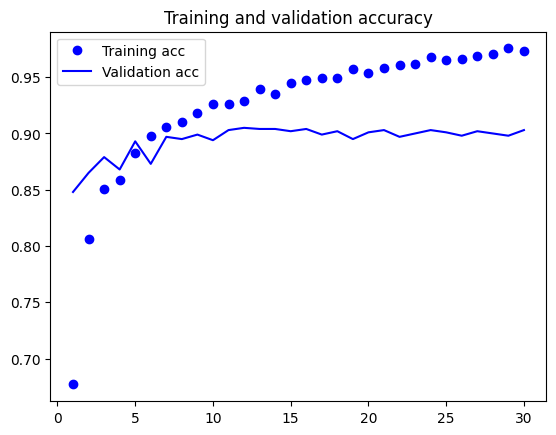

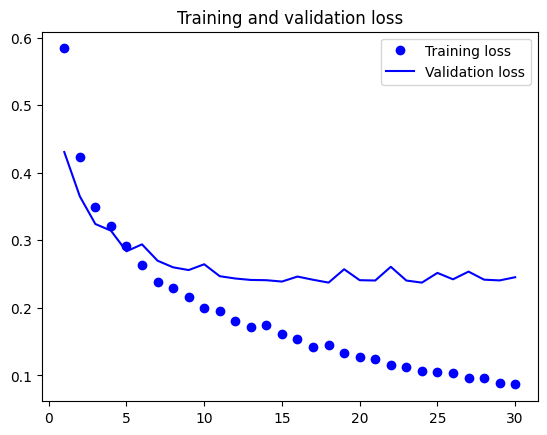

In [6]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()